# Predicting Clinical Trial Terminations
### Notebook 3: Baseline Modelling

**Author: Clement Chan**

---
Notes on the notebook:
- put something here

### Data Dictionary for this notebook that is based on clinicaltrials.gov:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| Study Title | Title of the Clinical Trial           | object |
| Study Status | Binary column, 0 for Completed Trials and 1 for Terminated Trials | int |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Whether the results are posted (yes = 1 or no = 0) | int|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | int |
| Age | Age group of participants: ADULT, OLDER_ADULT, CHILD  | int |
| Phases | Clinical trial phase of the study | int |
| Enrollment | Total number of participants in a study | int |
| Funder Type | Government, Industry, or Other | int |
| Study Type | Interventional = 1, Observational = 0 | int |
| Study Design | Study design based on study type | object |
| Start Date | Estimated/Actual date the first participant was enrolled | datetime |
| Primary Completion Date | Date the final participant was examined for the first outcome | datetime |
| Completion Date | Date the final participant was examined | datetime |
| Locations | Where the clinical study will be held | object |

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# dividing the data
from sklearn.model_selection import train_test_split

# scalars
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# model metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id = 'toc'><a/>
## Table of Contents

---
1. [blah](#blah)


<a id = 'blah'></a>
## 1. Blah

---
**Load the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')#Directory where Google Drive is mounted within the Colab environment.

Mounted at /content/gdrive


In [3]:
# Using Google Collab
df=pd.read_csv('gdrive/My Drive/data/model_ctg.csv', index_col = 0)
df.head()

,Study Status,Study Results,Study Type,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,...,Duration(days)__0-122,Duration(days)__123-244,Duration(days)__245-365,Duration(days)__366-515,Duration(days)__516-671,Duration(days)__672-861,Duration(days)__862-1097,Duration(days)__1098-1460,Duration(days)__1461-2049,Duration(days)__2050-38562
0,0,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# # Using Jupyter notebook
# df = pd.read_csv('model_ctg.csv', index_col = 0)

# First 5 rows of dataset
# df.head()

,Study Status,Study Results,Study Type,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,...,Duration(days)__0-122,Duration(days)__123-244,Duration(days)__245-365,Duration(days)__366-515,Duration(days)__516-671,Duration(days)__672-861,Duration(days)__862-1097,Duration(days)__1098-1460,Duration(days)__1461-2049,Duration(days)__2050-38562
0,0,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Let's look at the shape of the dataframe.

In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 305110 rows and 228 columns.


**Baseline Model - Logistic Regression**

First we will start with a basic Logistic Regression as our baseline model classifier to determine the accuracy of the predictions and then the f1 score metrics. We will need to scale the data since Logistic Regression is a linear model and unscaled distances can impact the results greatly.

1. Select the independant and dependant variables
2. Divide the dataset into training and testing sets
3. Scale the data using StandardScaler()
4. Fit the LogisticRegression() model
5. Analyze the model results by comparing accuracy, precision, and recall

In [4]:
# setting independant and dependant variables
X = df.drop(columns='Study Status')
y = df['Study Status']

In [5]:
# dividing the data with 20% test size with random state of 12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

# sanity check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(244088, 227) (61022, 227) (244088,) (61022,)


**Standard Scaler**

In [6]:
# instantiate scaler
ss = StandardScaler()

# fit the scaler
ss.fit(X_train)

# transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

**Logistic Regression**

In [8]:
# Instantiate Logreg
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train_ss, y_train)

# find the scores
print(f'Training Score: {logreg.score(X_train_ss, y_train)}')
print(f'Testing score: {logreg.score(X_test_ss, y_test)}')

Training Score: 0.9073489888892531
Testing score: 0.9070171413588541


Just from the basic logistic regression, we are getting a high accuract of 90.7% from both training and test scores. There doesn't seem to be any overfitting so regularization is not required for now. Next we should look into the confusion matrix and evaluate the model.

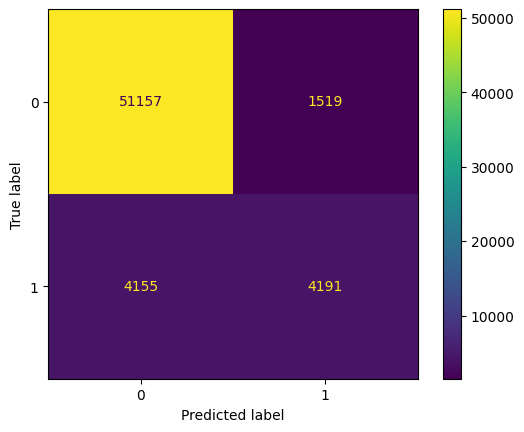

In [9]:
# Get class predictions
y_pred = logreg.predict(X_test_ss)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_ss, y_test)

The logistic regression model is very good at classifying the **True Negatives** or the actual completed trials, but seems to be missing a lot of predictions in the **True Positive** or the actual terminated trials. Let's look at this further in a classification report.

In [10]:
base_logreg_report = classification_report(y_test, y_pred)
print(base_logreg_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52676
           1       0.73      0.50      0.60      8346

    accuracy                           0.91     61022
   macro avg       0.83      0.74      0.77     61022
weighted avg       0.90      0.91      0.90     61022



The recall scores are the actual labels that the model correctly predicted, and we can see that the model is very bad at classifying class 1 or the terminated trials. So out of 8346 terminated trials, the model only classified 50% of actual terminated trials. On the other hand, precision scores measure how many terminated trials the model correctly predicted which is 73%. The **f1-score** is a metric that looks into the harmonic mean between precision and recall which is a good indicator of how the model is performing.

**Selecting Best Features with KBest**

From our dataframe, there are 417 columns or independent variables which is a crazy amount and is difficult to see what variable has the largest impact on predicting terminated trials. We will use SelectKBest() with f_classifier which returns the F-statistic of ANOVA. In simpler words, we will be comparing the variances of each independent variable with the dependent variable and determine what independent variables has the most significant effect on the dependent variable.

In [7]:
# Instantiate KBest feature selector and fit
my_KBest = SelectKBest(f_classif, k=1).fit(X_train, y_train)

# score
# my_KBest.scores_

In [8]:
my_KBest.get_feature_names_out()

array(['Enrollment__0-8'], dtype=object)

In [12]:
train_scores = []
test_scores = []

ks = list(range(15, 30, 5))

for k in ks:

    # Select your features based on K best
    my_Kbest = SelectKBest(f_classif, k=k).fit(X_train, y_train)

    # Transform to get K Best Features
    X_train_selected = my_Kbest.transform(X_train)
    X_test_selected = my_Kbest.transform(X_test)
    p_value = my_Kbest.pvalues_



    # Create the model on the transformed data
    model = LogisticRegression()
    model.fit(X_train_selected, y_train)


    print(f"k={k}")
    print(f"Best variables: {np.array(my_Kbest.get_feature_names_out())}")
    print("")

    print("p-values", p_value[my_Kbest.get_support()])

    print("-----------------------------------------------------------------")
    print("")

    train_scores.append(model.score(X_train_selected, y_train))
    test_scores.append(model.score(X_test_selected, y_test))


k=15
Best variables: ['Study Type' 'Age_OLDER_ADULT' 'Phases_NO PHASE' 'Phases_PHASE2'
 'Enrollment__0-8' 'Enrollment__20-29' 'Enrollment__30-41'
 'Enrollment__42-59' 'Enrollment__60-79' 'Enrollment__80-119'
 'Enrollment__120-209' 'Enrollment__210-490' 'Enrollment__491-188814085'
 'Country_Egypt' 'Country_United States']

p-values [8.98079445e-185 3.58502650e-270 0.00000000e+000 0.00000000e+000
 0.00000000e+000 4.89377323e-091 8.60352116e-163 4.94065646e-324
 1.36555950e-259 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 9.68623171e-117 0.00000000e+000]
-----------------------------------------------------------------

k=20
Best variables: ['Study Type' 'Age_CHILD' 'Age_OLDER_ADULT' 'Phases_NO PHASE'
 'Phases_PHASE2' 'Enrollment__0-8' 'Enrollment__20-29' 'Enrollment__30-41'
 'Enrollment__42-59' 'Enrollment__60-79' 'Enrollment__80-119'
 'Enrollment__120-209' 'Enrollment__210-490' 'Enrollment__491-188814085'
 'Country_China' 'Country_Egypt' 'Country_Pakistan'
 'Country_

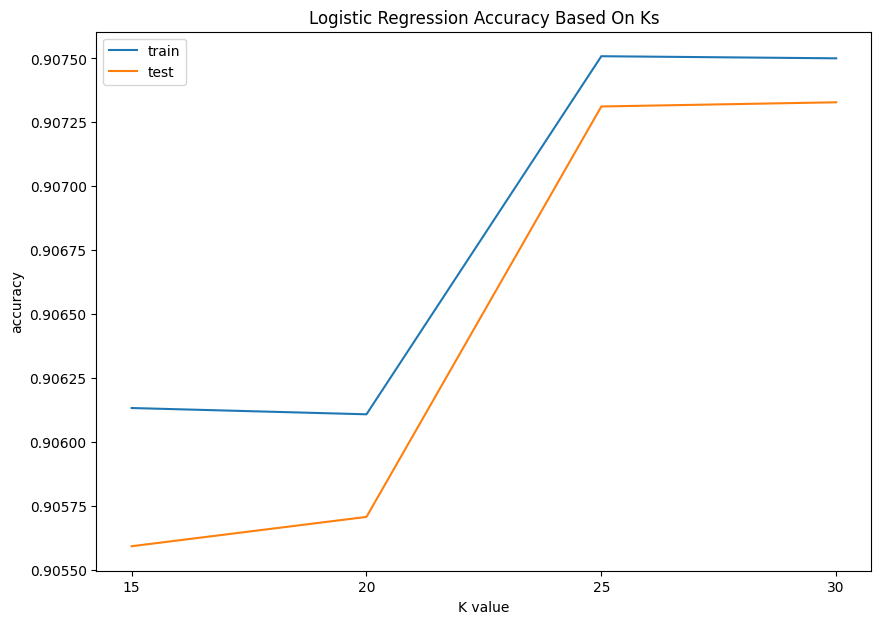

In [17]:
plt.figure(figsize=(10,7))
plt.plot(ks, train_scores, label="train")
plt.plot(ks, test_scores, label="test")
plt.title("Logistic Regression Accuracy based on ks".title())
plt.xlabel("K value")
plt.ylabel("accuracy")
plt.xticks(ks)
plt.legend()
plt.show()